# ANOVA with R: analysis of the *diet* dataset

Source : https://bioinformatics-core-shared-training.github.io/linear-models-r/

I am using a modified version of the dataset *diet* may be found online on the U. of Sheffield website <https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv>

The data set contains information on 76 people who undertook one of three diets (referred to as diet _A_, _B_ and _C_). There is background information such as age, gender, and height. The aim of the study was to see which diet was best for losing weight.

## Section 1: Import data and descriptive analysis

Lets starts by

* importing the data set *diet* with the function `read.csv()`  
* defining a new column *weight.loss*, corresponding to the difference between the initial and final weights (respectively the corresponding to the columns `initial.weight` and `final.weight` of the dataset) 
* displaying _weight loss_ per _diet type_ (column `diet.type`) by means of a boxplot.

In [3]:
diet = read.csv("./data/diet.csv",row.names=1)
head(diet)
diet$weight.loss = diet$initial.weight - diet$final.weight 

,gender,age,height,diet.type,initial.weight,final.weight
,<chr>,<int>,<int>,<chr>,<int>,<dbl>
1,Female,22,159,A,58,54.2
2,Female,46,192,A,60,54.0
3,Female,55,170,A,64,63.3
4,Female,33,171,A,64,61.1
5,Female,50,170,A,65,62.2
6,Female,50,201,A,66,64.0


### Box Plot

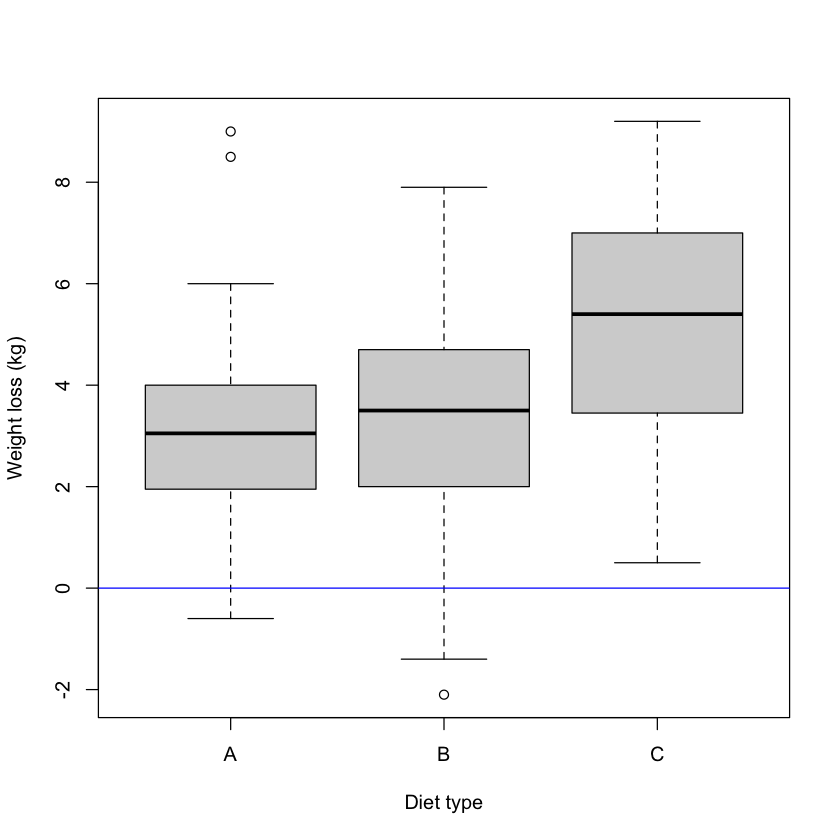

In [4]:
boxplot(weight.loss~diet.type,data=diet,col="light gray",
        ylab = "Weight loss (kg)", xlab = "Diet type")
abline(h=0,col="blue")

### Box Plot with Tidyverse

In [5]:
library("broom")
library("tidyverse")

In [7]:
dietyd <- read_csv("./data/diet.csv",show_col_types = FALSE) 
dietyd %>% spec()
head(dietyd)
#as_tibble(dietyd)

cols(
  id = col_double(),
  gender = col_character(),
  age = col_double(),
  height = col_double(),
  diet.type = col_character(),
  initial.weight = col_double(),
  final.weight = col_double()
)

id,gender,age,height,diet.type,initial.weight,final.weight
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,Female,22,159,A,58,54.2
2,Female,46,192,A,60,54.0
3,Female,55,170,A,64,63.3
4,Female,33,171,A,64,61.1
5,Female,50,170,A,65,62.2
6,Female,50,201,A,66,64.0


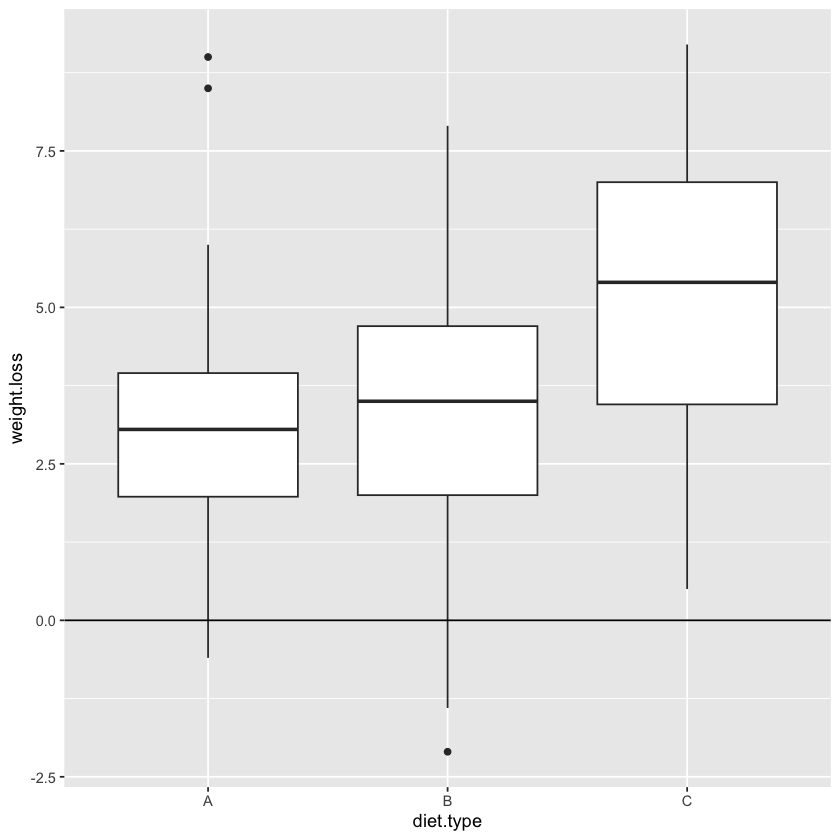

In [8]:
dietyd$weight.loss = dietyd$initial.weight - dietyd$final.weight 
boxplot_weightloss <- ggplot(data=dietyd, aes(x=diet.type, y=weight.loss)) +
                      geom_boxplot() + geom_hline(yintercept = 0)
boxplot_weightloss

## Section 2: ANOVA

Lets 

* perform a Fisher's, Welch's and Kruskal-Wallis one-way ANOVA, respectively by means of the functions `aov()`, `oneway.test()` and `kruskal.test`,  
* display and analyse the results: Use the function `summary()` to display the results of an R object of class `aov` and the function `print()` otherwise.

In [9]:
diet.fisher  = aov(weight.loss~diet.type,data=diet)
diet.welch   = oneway.test(weight.loss~diet.type,data=diet)
diet.kruskal = kruskal.test(weight.loss~diet.type,data=diet)

### ANOVA results

In [10]:
summary(diet.fisher)
print(diet.welch)

            Df Sum Sq Mean Sq F value Pr(>F)   
diet.type    2   60.5  30.264   5.383 0.0066 **
Residuals   73  410.4   5.622                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	One-way analysis of means (not assuming equal variances)

data:  weight.loss and diet.type
F = 5.2693, num df = 2.00, denom df = 48.48, p-value = 0.008497



### ANOVA and t-test
Note that, when the interest lies in the difference between two means, the Fisher's ANOVA (fonction `aov()`) and the Student's t-test (function `t.test()` with argument `var.equal` set to `TRUE`) leads to the same results.

In [11]:
summary(aov(weight.loss~diet.type,
            data=diet[diet$diet.type!="B",]))

            Df Sum Sq Mean Sq F value  Pr(>F)   
diet.type    1   43.4    43.4   8.036 0.00664 **
Residuals   49  264.6     5.4                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [12]:
t.test(weight.loss~diet.type,
       data=diet[diet$diet.type!="B",],var.equal = TRUE)


	Two Sample t-test

data:  weight.loss by diet.type
t = -2.8348, df = 49, p-value = 0.006644
alternative hypothesis: true difference in means between group A and group C is not equal to 0
95 percent confidence interval:
 -3.1582988 -0.5379975
sample estimates:
mean in group A mean in group C 
       3.300000        5.148148 


## Section 3: Mutiple comparisons

Let's

* perform a Tukey HSD test to define which group pair(s) have different means (by means of the function `TukeyHSD()`) 
* compare the Tukey HSD confidence interval size for the difference of means between the weight losses of *Diet A* and *Diet B* with the one obtained by means of a Student's t-test (function `t.test()` with argument `var.equal` set to `TRUE`)




	Two Sample t-test

data:  weight.loss by diet.type
t = -2.7889, df = 50, p-value = 0.007463
alternative hypothesis: true difference in means between group B and group C is not equal to 0
95 percent confidence interval:
 -3.2342365 -0.5260598
sample estimates:
mean in group B mean in group C 
       3.268000        5.148148 



	Two Sample t-test

data:  weight.loss by diet.type
t = -2.8348, df = 49, p-value = 0.006644
alternative hypothesis: true difference in means between group A and group C is not equal to 0
95 percent confidence interval:
 -3.1582988 -0.5379975
sample estimates:
mean in group A mean in group C 
       3.300000        5.148148 



	Two Sample t-test

data:  weight.loss by diet.type
t = 0.0475, df = 47, p-value = 0.9623
alternative hypothesis: true difference in means between group A and group B is not equal to 0
95 percent confidence interval:
 -1.323275  1.387275
sample estimates:
mean in group A mean in group B 
          3.300           3.268 


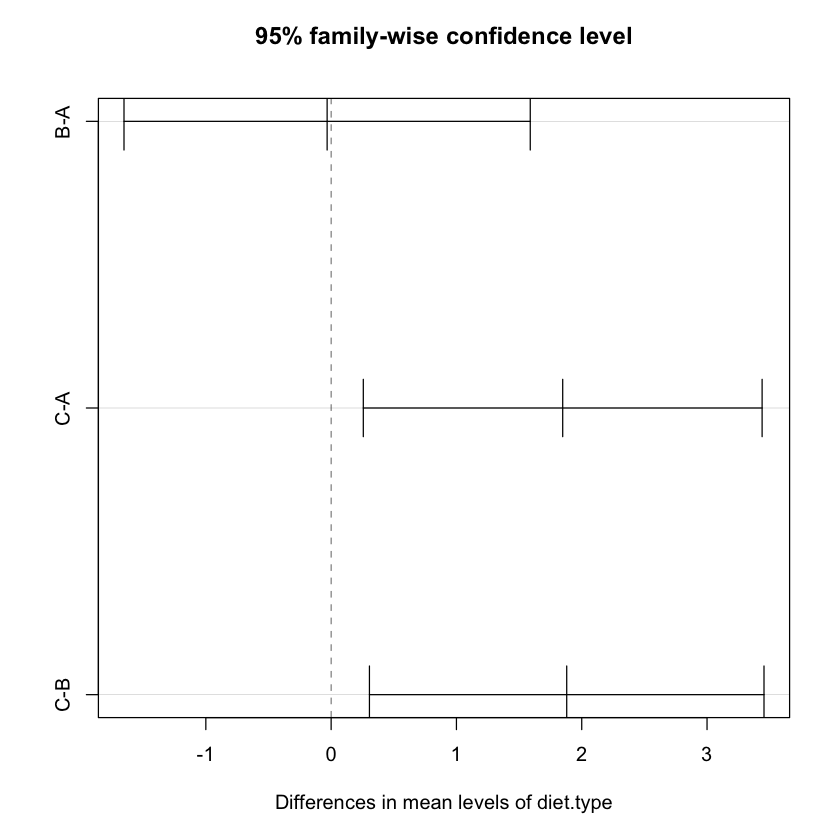

In [13]:
plot(TukeyHSD(diet.fisher))

t.test(weight.loss~diet.type,
       data=diet[diet$diet.type!="A",],var.equal = TRUE)

t.test(weight.loss~diet.type,
       data=diet[diet$diet.type!="B",],var.equal = TRUE)

t.test(weight.loss~diet.type,
       data=diet[diet$diet.type!="C",],var.equal = TRUE)